In [ ]:
import pandas as pd
import spacy

In [ ]:
!gdown --id 1LzilUSSAEfMZvBK2q7AIHQnYmQJdfQF5 --output chat_messages_cleaned_chat_messages_cleaned.csv
!gdown --id 1oDUkLPYQwgLH6hcA0phnKmMk0L7Xjjok --output sample_team_chats_sample_team_chats.csv
!gdown --id 1ZR5BPuyYCHlo_ZngbcSLDoK0eqpPPAyi --output Lemma_data.xlsx
!gdown --id 1SFgaa0ljkyqJ6POXNXNbmIJa-SjR2P6I --output DesignIntent2.csv

Downloading...
From: https://drive.google.com/uc?id=1LzilUSSAEfMZvBK2q7AIHQnYmQJdfQF5
To: /content/chat_messages_cleaned_chat_messages_cleaned.csv
100% 1.01M/1.01M [00:00<00:00, 16.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oDUkLPYQwgLH6hcA0phnKmMk0L7Xjjok
To: /content/sample_team_chats_sample_team_chats.csv
100% 113k/113k [00:00<00:00, 3.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZR5BPuyYCHlo_ZngbcSLDoK0eqpPPAyi
To: /content/Lemma_data.xlsx
100% 233k/233k [00:00<00:00, 7.40MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SFgaa0ljkyqJ6POXNXNbmIJa-SjR2P6I
To: /content/DesignIntent2.csv
100% 37.1k/37.1k [00:00<00:00, 5.03MB/s]


In [ ]:
orig = pd.read_csv("chat_messages_cleaned_chat_messages_cleaned.csv")
intent = pd.read_csv("sample_team_chats_sample_team_chats.csv")

In [ ]:
orig

Unnamed: 0 participant__session__code  ...  catalog  parameter_db
0              0                   umtzl2qt  ...        0             0
1              1                   umtzl2qt  ...        0             0
2              2                   umtzl2qt  ...        0             0
3              3                   umtzl2qt  ...        0             0
4              4                   umtzl2qt  ...        0             0
...          ...                        ...  ...      ...           ...
7685        7685                   8hwn1gy2  ...        0             0
7686        7686                   8hwn1gy2  ...        0             0
7687        7687                   8hwn1gy2  ...        0             0
7688        7688                   8hwn1gy2  ...        0             0
7689        7689                   8hwn1gy2  ...        0             0

[7690 rows x 13 columns]

In [ ]:
orig['timestamp'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1554813515
1       1554813548
2       1554813562
3       1554813564
4       1554813575
           ...    
7685    1555014041
7686    1555014046
7687    1555014072
7688    1555014096
7689    1555014116
Name: timestamp, Length: 7690, dtype: int64>

In [ ]:
intent

Unnamed: 0  ...                   Intention
0          3417  ...      Asking parameter value
1          3421  ...  Suggesting parameter value
2          3423  ...             Acknowledgement
3          3425  ...  Suggesting parameter value
4          3428  ...    Understanding dependency
..          ...  ...                         ...
807        2401  ...                         NaN
808        2429  ...                         NaN
809        2432  ...                         NaN
810        2436  ...                         NaN
811        2440  ...                         NaN

[812 rows x 14 columns]

In [ ]:
intent['timestamp'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1554989809
1      1554989856
2      1554989865
3      1554989876
4      1554989938
          ...    
807    1554826111
808    1554826163
809    1554826174
810    1554826181
811    1554826197
Name: timestamp, Length: 812, dtype: int64>

In [ ]:
intent['Intention'].notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
807    False
808    False
809    False
810    False
811    False
Name: Intention, Length: 812, dtype: bool

In [ ]:
intent['Intention'].notnull().value_counts()

False    425
True     387
Name: Intention, dtype: int64

In [ ]:
intent.value_counts()

Unnamed: 0  participant__session__code  participant__session_id  participant__id_in_session  participant__code  channel                sender_role  body                                                                     timestamp   recipient__code  recipient_role  catalog  parameter_db  Intention                                  
4795        1x32i6ma                    3                        3                           z3dco7z1           3-engine_design-1-1-3  crankshaft   FOS 2.06                                                                 1554999204  yzr1e8du         piston          0        1             Suggesting subsystem objectives information    1
3743        03858kxd                    1                        4                           gvdgbam9           1-engine_design-1-3-4  conrod       same sounds good                                                         1554991170  v9fe9kul         crankshaft      0        0             Acknowledgement                         

In [ ]:
pre = pd.read_excel("Lemma_data.xlsx")

In [ ]:
pre

id                                               body
0        1  ['hi', 'piston', 'my', 'crankshaft', 'depends'...
1        2                                   ['thank', 'you']
2        3  ['how', 'low', 'can', 'you', 'go', 'on', 'the'...
3        4  ['all', 'my', 'factor', 'of', 'safety', 'value...
4        5  ['hi', 'flywheel', 'my', 'crankshaft', 'depend...
...    ...                                                ...
7685  7686                    ['ok', 'no', 'one', 'anything']
7686  7687                     ['increase', 'it', 'to', '50']
7687  7688  ['what', 'about', 'thickness', 'of', 'flywheel...
7688  7689                      ['its', 'at', '12', 'lowest']
7689  7690       ['raise', 'it', 'a', 'little', 'like', '20']

[7690 rows x 2 columns]

In [ ]:
pre = pre.drop(['id'],axis = 1)

In [ ]:
pre

body
0     ['hi', 'piston', 'my', 'crankshaft', 'depends'...
1                                      ['thank', 'you']
2     ['how', 'low', 'can', 'you', 'go', 'on', 'the'...
3     ['all', 'my', 'factor', 'of', 'safety', 'value...
4     ['hi', 'flywheel', 'my', 'crankshaft', 'depend...
...                                                 ...
7685                    ['ok', 'no', 'one', 'anything']
7686                     ['increase', 'it', 'to', '50']
7687  ['what', 'about', 'thickness', 'of', 'flywheel...
7688                      ['its', 'at', '12', 'lowest']
7689       ['raise', 'it', 'a', 'little', 'like', '20']

[7690 rows x 1 columns]

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
long_string = ','.join(list(pre['body'].values))

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [ ]:
wordcloud.generate(long_string)


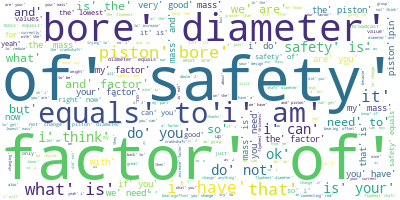

In [ ]:
wordcloud.to_image()

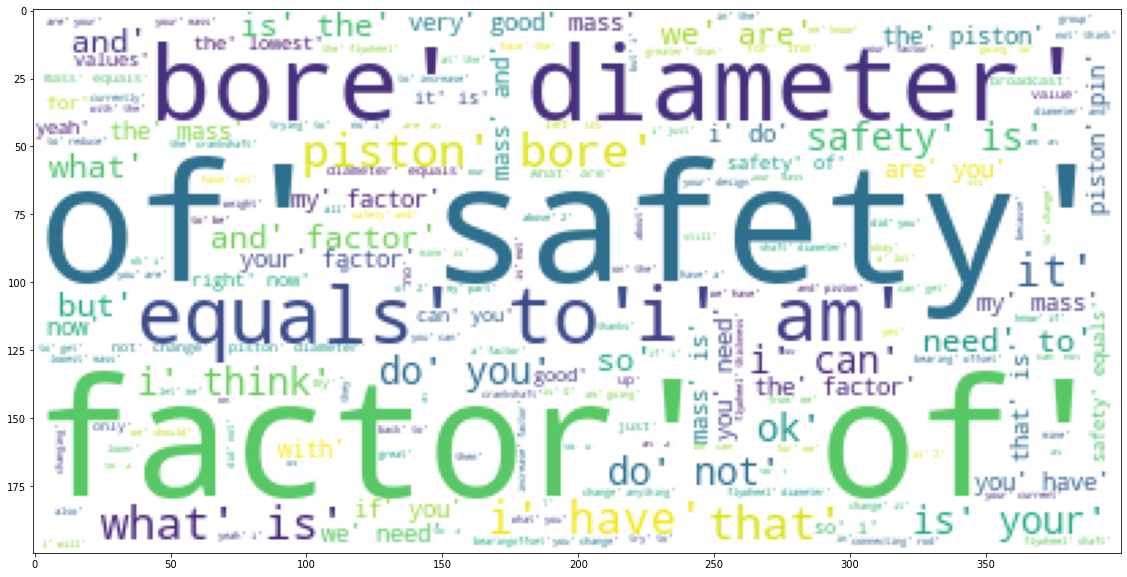

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = pre.body.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['hi', 'piston', 'crankshaft', 'depends', 'bore', 'diameter', 'yet', 'know', 'probably', 'help', 'know']


In [ ]:
data_words

[['hi',
  'piston',
  'crankshaft',
  'depends',
  'bore',
  'diameter',
  'yet',
  'know',
  'probably',
  'help',
  'know'],
 ['thank'],
 ['low', 'go', 'piston', 'bore', 'diameter'],
 ['factor',
  'safety',
  'values',
  'hundreds',
  'suspect',
  'depends',
  'lot',
  'bearingoffset'],
 ['hi',
  'flywheel',
  'crankshaft',
  'depends',
  'flywheel',
  'shaft',
  'diameter',
  'piston',
  'bore',
  'diameter',
  'thickness',
  'flywheel',
  'yet',
  'know',
  'probably',
  'help',
  'know'],
 ['min'],
 ['value', 'works', 'best', 'simulation'],
 ['value', 'bore', 'diameter'],
 ['let', 'play', 'around', 'numbers'],
 ['flywheel',
  'also',
  'depends',
  'crankshaft',
  'bearing',
  'offset',
  'bearingoffset'],
 ['broadcasted', 'recent', 'simulation', 'definitely', 'final', 'one'],
 ['sounds', 'good'],
 ['yes', 'broadcast'],
 ['sounds', 'good', 'tried', 'middle', 'values', 'broadcast'],
 ['thank', 'information'],
 ['hey',
  'conrod',
  'curious',
  'thought',
  'good',
  'piston',
  'd

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"piston" + 0.021*"design" + 0.021*"diameter" + 0.020*"change" + '
  '0.016*"let" + 0.014*"yes" + 0.014*"know" + 0.014*"mm" + 0.014*"crankshaft" '
  '+ 0.013*"variables"'),
 (1,
  '0.038*"ok" + 0.026*"flywheel" + 0.023*"mass" + 0.018*"diameter" + '
  '0.016*"safety" + 0.016*"factor" + 0.013*"good" + 0.011*"make" + '
  '0.011*"need" + 0.011*"one"'),
 (2,
  '0.037*"piston" + 0.037*"good" + 0.029*"values" + 0.024*"diameter" + '
  '0.021*"mass" + 0.019*"pin" + 0.018*"equals" + 0.016*"okay" + 0.013*"got" + '
  '0.012*"yeah"'),
 (3,
  '0.103*"factor" + 0.103*"safety" + 0.064*"mass" + 0.038*"diameter" + '
  '0.027*"piston" + 0.024*"equals" + 0.023*"bore" + 0.016*"think" + '
  '0.014*"need" + 0.012*"change"')]


In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models
# import pickle 
# import os
# # Visualize the topics
# pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared

In [ ]:
#!conda install -c memex pyldavis

In [ ]:
#!python -m pip install -U pyLDAvis

    -- GAN from labels/topics and then new messages
    -- input to generator?

In [ ]:
dtf = pd.read_csv("DesignIntent2.csv")

In [ ]:
dtf

body                                           intent_2
0    Hi piston! My crankshaft depends on your bore ...                                                NAN
1                                           thank you!                                                NAN
2      How low can you go on the piston bore diameter?             Exploration of design parameter values
3    all my fos values are in the hundreds, i suspe...         Effects of design parameters on objectives
4    Hi flywheel! My crankshaft depends on your fly...             Dependencies between design parameters
..                                                 ...                                                ...
495  I just lowered it to 25.23. That is low for th...  Selected design parameter values for objective(s)
496  Can you cut any more mass out and get closer t...                        Tradeoff between objectives
497                                              sweet                                                NAN
498                            Yeah, that's not on me.                                                NAN
499  okay we're still above a factor of safety of 2...                        Monitoring objective values

[500 rows x 2 columns]

In [ ]:
#hi = hi.drop(['id'],axis = 1)

In [ ]:
dtf.columns = ['text','y']

In [ ]:
dtf

text                                                  y
0    Hi piston! My crankshaft depends on your bore ...                                                NAN
1                                           thank you!                                                NAN
2      How low can you go on the piston bore diameter?             Exploration of design parameter values
3    all my fos values are in the hundreds, i suspe...         Effects of design parameters on objectives
4    Hi flywheel! My crankshaft depends on your fly...             Dependencies between design parameters
..                                                 ...                                                ...
495  I just lowered it to 25.23. That is low for th...  Selected design parameter values for objective(s)
496  Can you cut any more mass out and get closer t...                        Tradeoff between objectives
497                                              sweet                                                NAN
498                            Yeah, that's not on me.                                                NAN
499  okay we're still above a factor of safety of 2...                        Monitoring objective values

[500 rows x 2 columns]

In [ ]:
dtf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   y       500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [ ]:
!gdown --id 1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4 --output nlp_util.py

Downloading...
From: https://drive.google.com/uc?id=1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4
To: /content/nlp_util.py
100% 72.3k/72.3k [00:00<00:00, 4.84MB/s]


In [ ]:
#!pip install -U spacy
#!python -m spacy download en_core_web_lg
#!pip install ner_displacy
from nlp_util import *

In [ ]:
#!pip install shap  

     |████████████████████████████████| 358kB 28.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491630 sha256=ffce6c9eba90a3de17f7f87aedb2dd1b7eb82ff8a7a7282a5de48a7b3e1b2f52
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


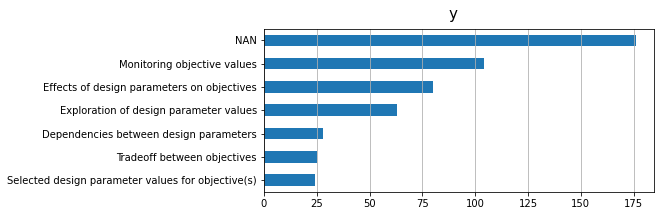

In [ ]:
plot_distributions(dtf, x="y", top=None, figsize=(7,3))


In [ ]:
dtf['y'].value_counts()

NAN                                                  176
Monitoring objective values                          104
Effects of design parameters on objectives            80
Exploration of design parameter values                63
Dependencies between design parameters                28
Tradeoff between objectives                           25
Selected design parameter values for objective(s)     24
Name: y, dtype: int64

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy import displacy
#import ner_displacy
ner = spacy.load("en_core_web_lg")
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART","LANGUAGE","DATE","TIME","PERCENT","MONEY","QUANTITY","ORDINAL","CARDINAL"]
ner_displacy(dtf["text"].iloc[0], ner, lst_tag_type, title="NER example")

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.


In [ ]:
#!pip install nlp_util

In [ ]:
# example of replacing text and tags extraction
utils_ner_text(dtf["text"].iloc[0], ner, lst_tag_type, grams_join="_")

("Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.",
 [])

In [ ]:
#!pip install rouge

In [ ]:
# this takes a while
dtf = add_ner_spacy(dtf, "text", ner, lst_tag_type, grams_join="_", create_features=True)
dtf.head()

--- tagging ---
--- counting tags ---
--- creating features ---


text  ... tags_LOC
0  Hi piston! My crankshaft depends on your bore ...  ...        0
1                                         thank you!  ...        0
2    How low can you go on the piston bore diameter?  ...        0
3  all my fos values are in the hundreds, i suspe...  ...        0
4  Hi flywheel! My crankshaft depends on your fly...  ...        0

[5 rows x 12 columns]

In [ ]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_tagged"].iloc[i])
print("tags:")
dtf["tags"].iloc[i]

Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.  --> 
Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.
tags:


[]

# NAN:


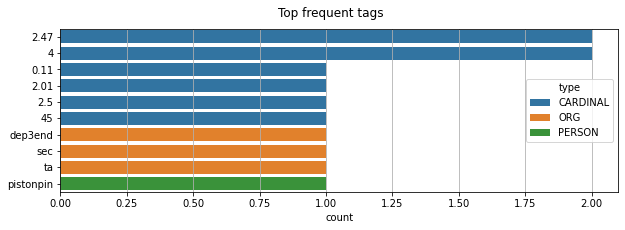

# Exploration of design parameter values:


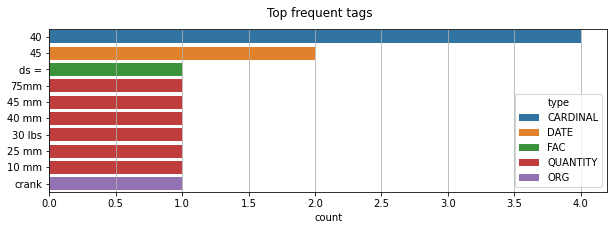

# Effects of design parameters on objectives:


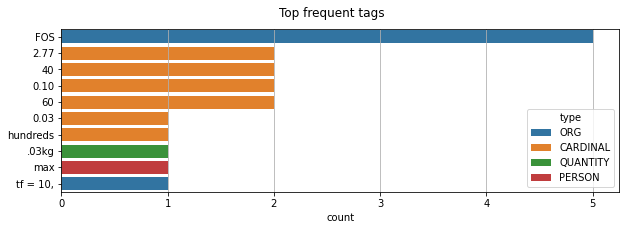

# Dependencies between design parameters:


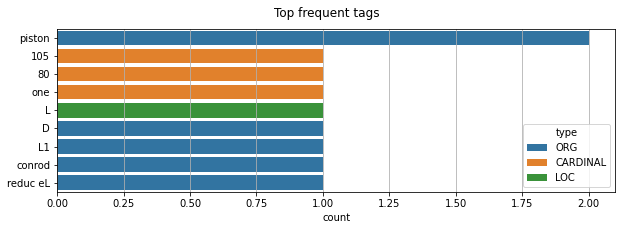

# Selected design parameter values for objective(s):


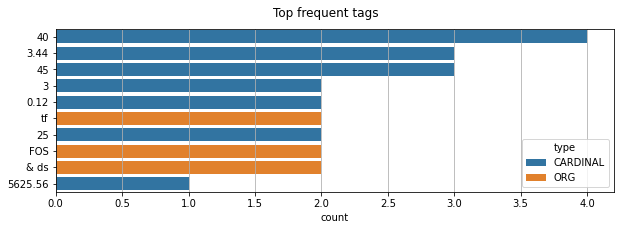

# Monitoring objective values:


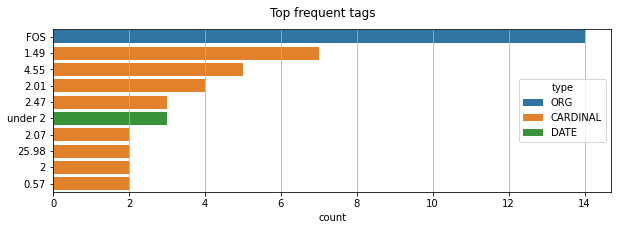

# Tradeoff between objectives:


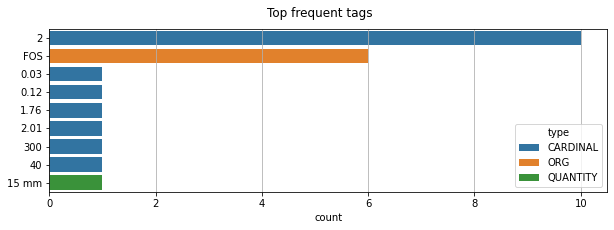

In [ ]:
for y in dtf["y"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=dtf[dtf["y"]==y]["tags"], top=10, figsize=(10,3))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` 

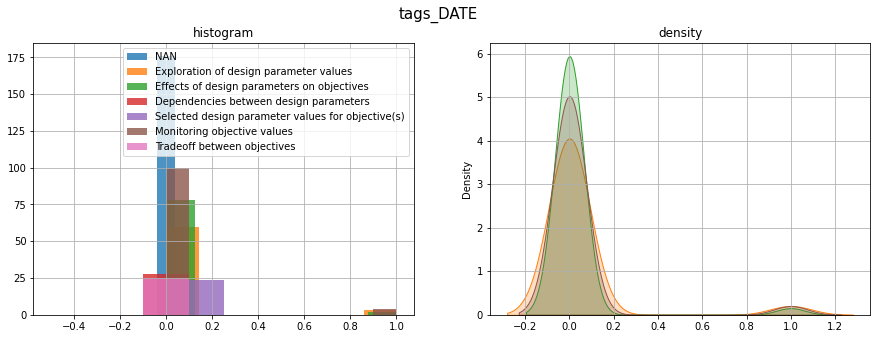

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

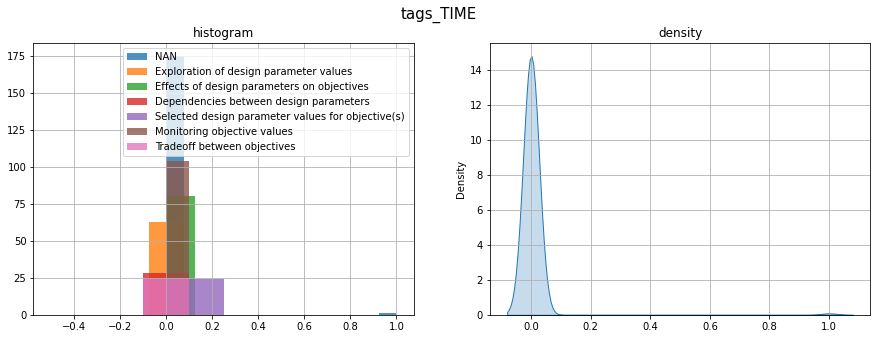

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

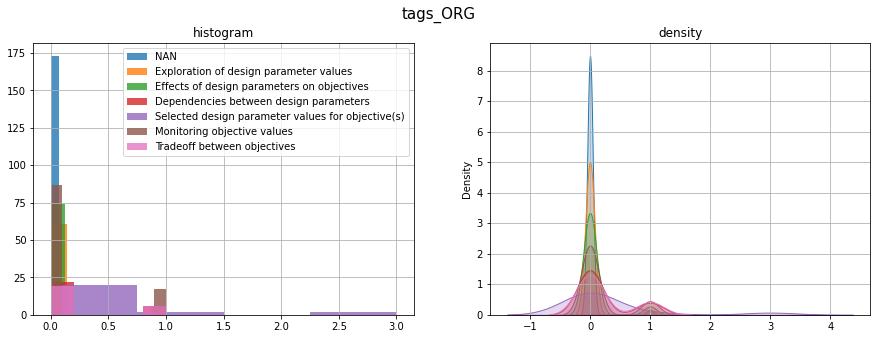

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` 

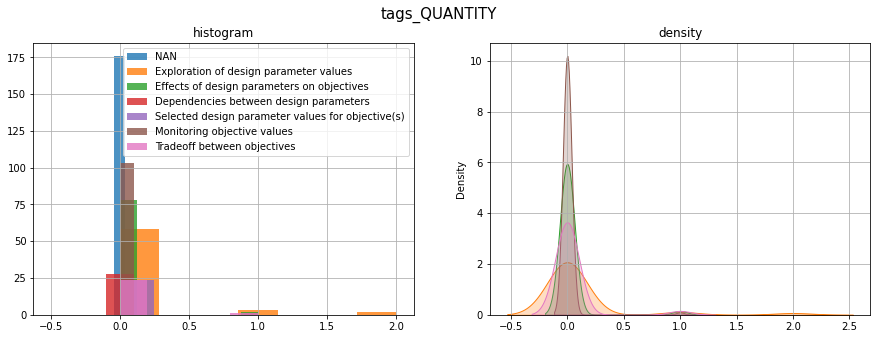

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` 

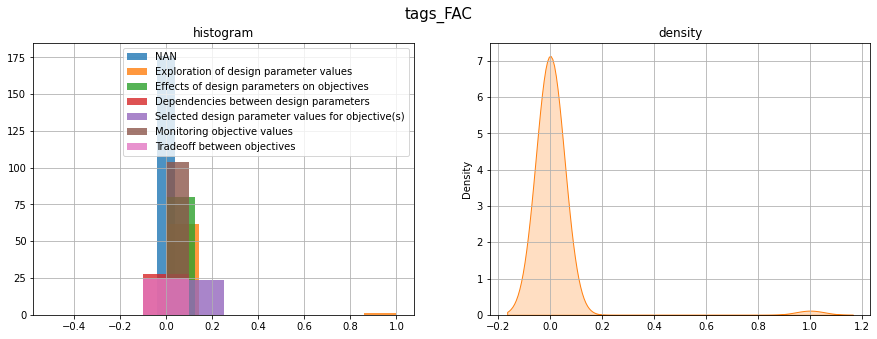

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

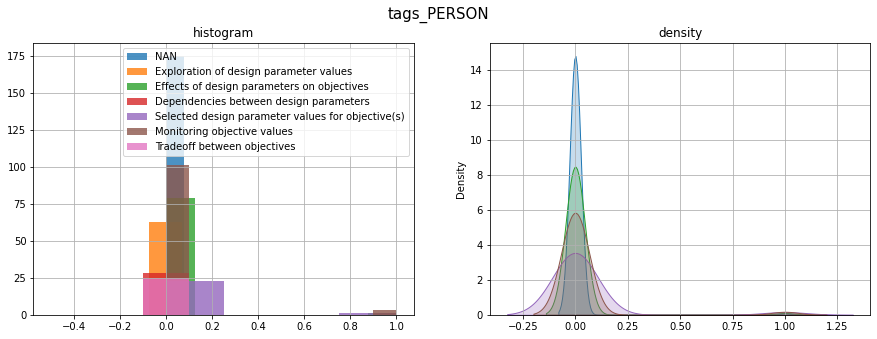

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

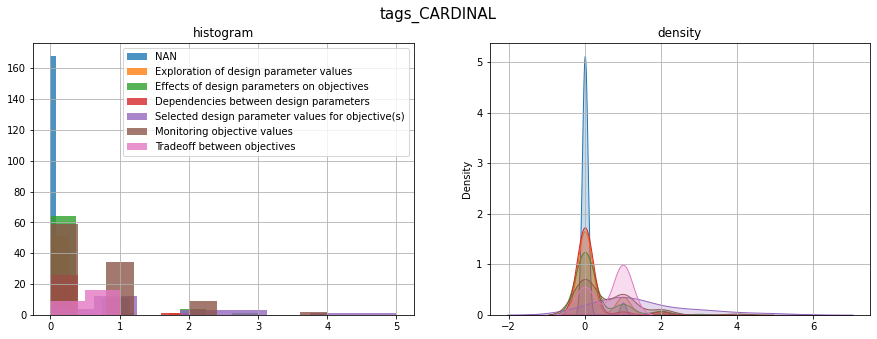

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has

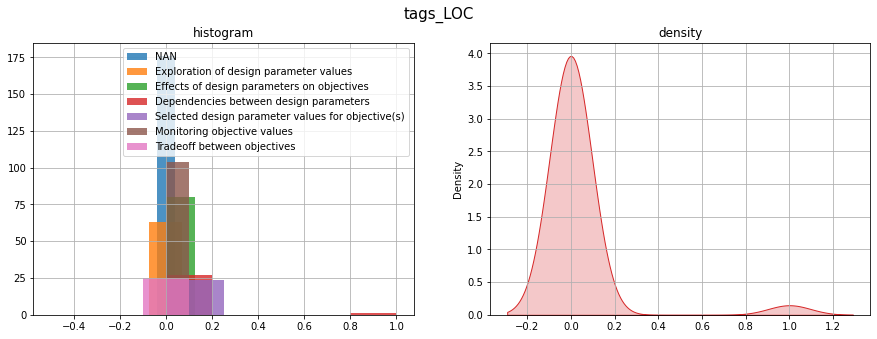

In [ ]:
# tags bivariate distribution
for x in dtf.filter(like="tags_", axis=1).columns:
    plot_distributions(dtf, x=x, y="y", bins=None, figsize=(15,5))

In [ ]:
# example
nltk.download('wordnet')
i = 0
print("--- original ---")
print(dtf["text"].iloc[i])

print("--- cleaning ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, lst_stopwords=None, stemm=False, lemm=True))

print("--- tokenization ---")
print(dtf["text"].iloc[i].split())

print("--- remove stopwords ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=None))

print("--- stemming ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=True, lemm=False))

print("--- lemmatisation ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=True))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
--- original ---
Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.
--- cleaning ---
hi piston my crankshaft depends on your bore diameter i dont yet know how but it will probably help that you know
--- tokenization ---
['Hi', 'piston!', 'My', 'crankshaft', 'depends', 'on', 'your', 'bore', 'diameter.', 'I', "don't", 'yet', 'know', 'how,', 'but', 'it', 'will', 'probably', 'help', 'that', 'you', 'know.']
--- remove stopwords ---
hi piston crankshaft depends bore diameter dont yet know probably help know
--- stemming ---
hi piston crankshaft depend bore diamet dont yet know probabl help know
--- lemmatisation ---
hi piston crankshaft depends bore diameter dont yet know probably help know


In [ ]:
# create stopwords
lst_stopwords = create_stopwords(["english"], 
                                 lst_add_words=["dtype","say","new","length","object","u","ha","wa"],
                                 lst_keep_words=["new"])
lst_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'dtype',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'object',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'o

In [ ]:
# preprocess text
dtf = add_preprocessed_text(dtf, "text", lst_regex=None, lst_stopwords=lst_stopwords, stemm=False, lemm=True)
dtf.head()

--- found NAs ---
           text text_clean
86       me too           
106          so           
132      not me           
173  i have not           
199        what           


text  ...                                         text_clean
0  Hi piston! My crankshaft depends on your bore ...  ...  Hi piston! My crankshaft depends bore diameter...
1                                         thank you!  ...                                         thank you!
2    How low can you go on the piston bore diameter?  ...                   How low go piston bore diameter?
3  all my fos values are in the hundreds, i suspe...  ...           fo value hundreds, suspect depends lot c
4  Hi flywheel! My crankshaft depends on your fly...  ...  Hi flywheel! My crankshaft depends flywheel sh...

[5 rows x 13 columns]

In [ ]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_clean"].iloc[i])

Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.  --> 
Hi piston! My crankshaft depends bore diameter. I yet know how, probably help know.


In [ ]:
nltk.download('punkt')
dtf = add_text_length(dtf, "text_clean")
dtf.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
                     min       mean    max
char_count           1.0  26.599593  137.0
word_count           1.0   6.367886   29.0
sentence_count       1.0   1.136179    3.0
avg_word_length      1.0   4.279676   12.0
avg_sentence_lenght  1.0   5.633469   22.0


text  ... avg_sentence_lenght
0  Hi piston! My crankshaft depends on your bore ...  ...                 6.0
1                                         thank you!  ...                 3.0
2    How low can you go on the piston bore diameter?  ...                 7.0
3  all my fos values are in the hundreds, i suspe...  ...                 8.0
4  Hi flywheel! My crankshaft depends on your fly...  ...                 9.0

[5 rows x 18 columns]

In [ ]:
# check
i = 1
print(dtf["text_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", dtf[col].iloc[i])

thank you!  --> 
word_count: 3
char_count: 9
sentence_count: 1
avg_word_length: 3.0
avg_sentence_lenght: 3.0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

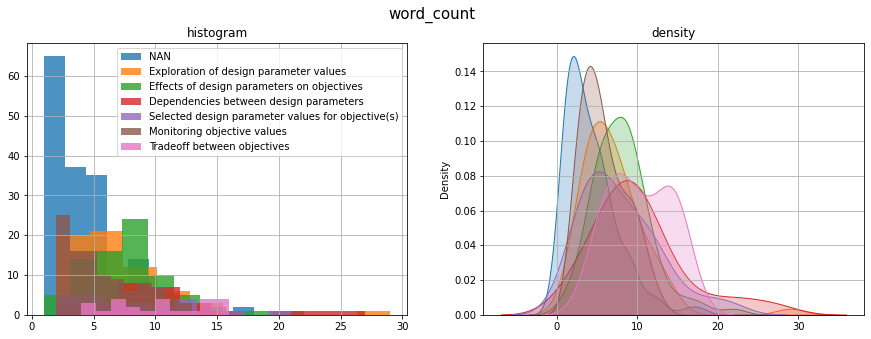

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

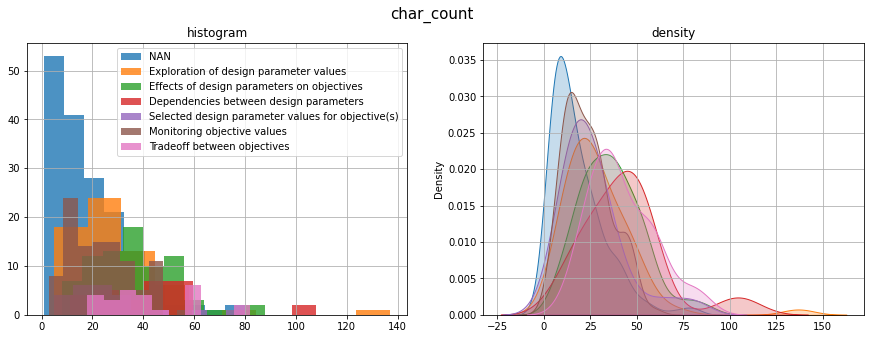

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

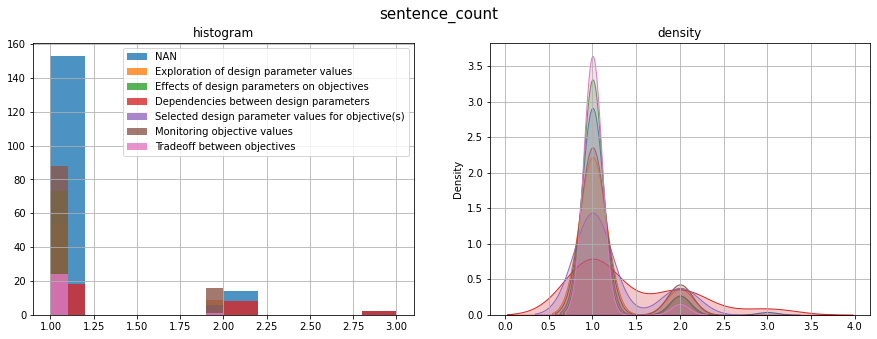

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

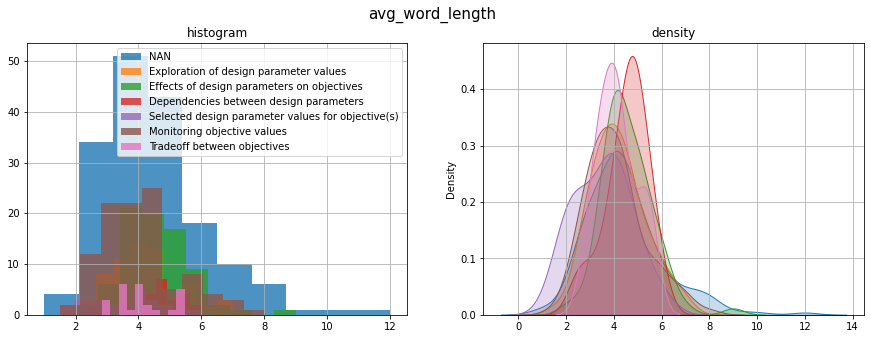

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

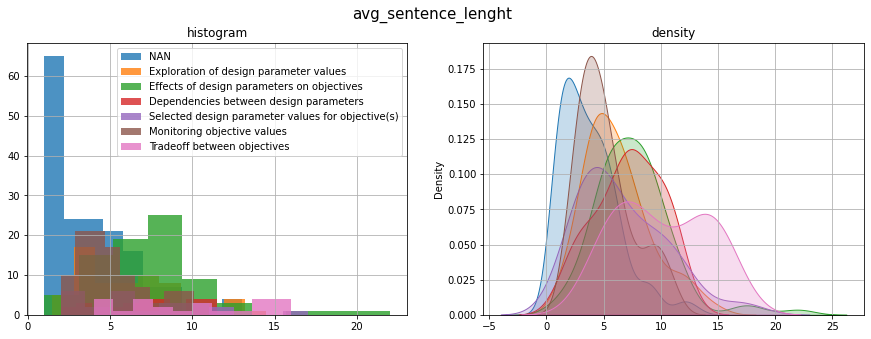

In [ ]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    plot_distributions(dtf, x=col, y="y", bins=10, figsize=(15,5))

In [ ]:
#Sentiment Analysis
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(-1,1))
dtf.head()

           count      mean       std  min  25%  50%  75%  max
sentiment  492.0  0.155021  0.303742 -0.7  0.0  0.0  0.3  1.0


text  ... sentiment
0  Hi piston! My crankshaft depends on your bore ...  ...       0.0
1                                         thank you!  ...       0.0
2    How low can you go on the piston bore diameter?  ...       0.0
3  all my fos values are in the hundreds, i suspe...  ...       0.0
4  Hi flywheel! My crankshaft depends on your fly...  ...       0.0

[5 rows x 19 columns]

In [ ]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ", dtf["sentiment"].iloc[i])

Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.  -->  0.0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

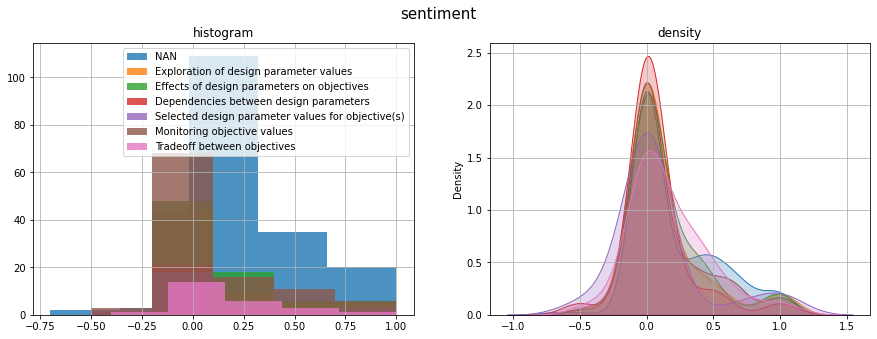

In [ ]:
plot_distributions(dtf, x="sentiment", y="y", bins=5, figsize=(15,5))

In [ ]:
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(0,1))

           count      mean       std  min       25%       50%       75%  max
sentiment  492.0  0.502954  0.178672  0.0  0.411765  0.411765  0.588235  1.0


# NAN:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


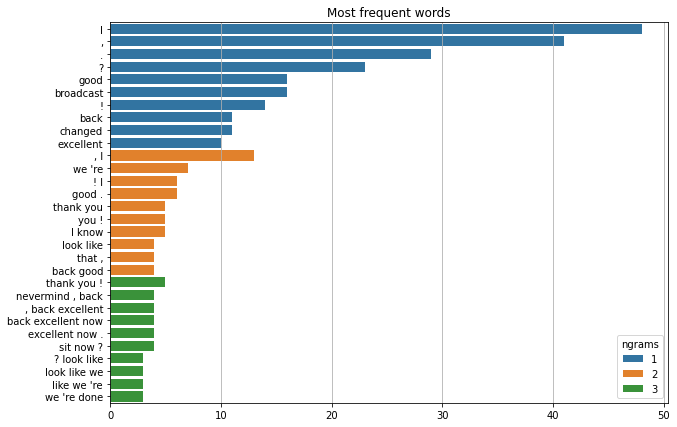

# Exploration of design parameter values:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


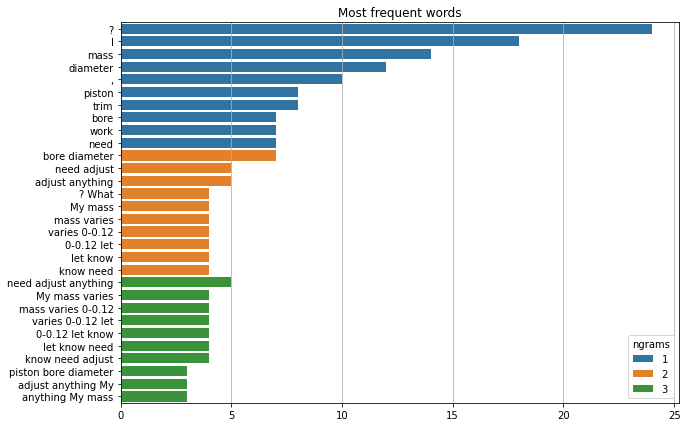

# Effects of design parameters on objectives:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


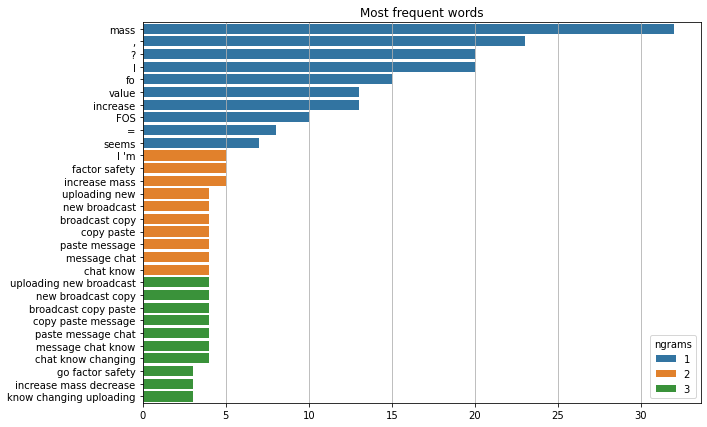

# Dependencies between design parameters:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


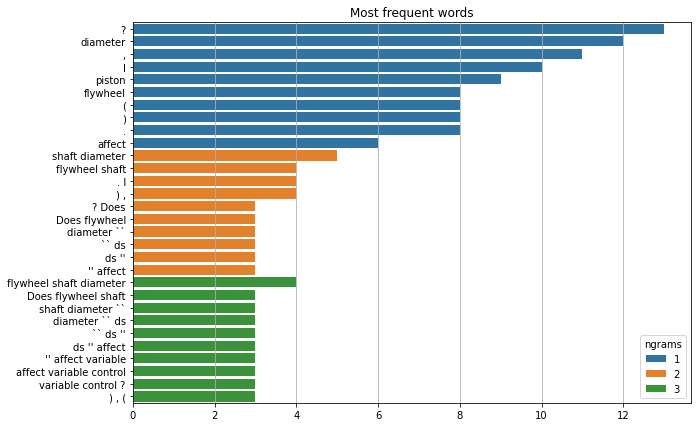

# Selected design parameter values for objective(s):


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


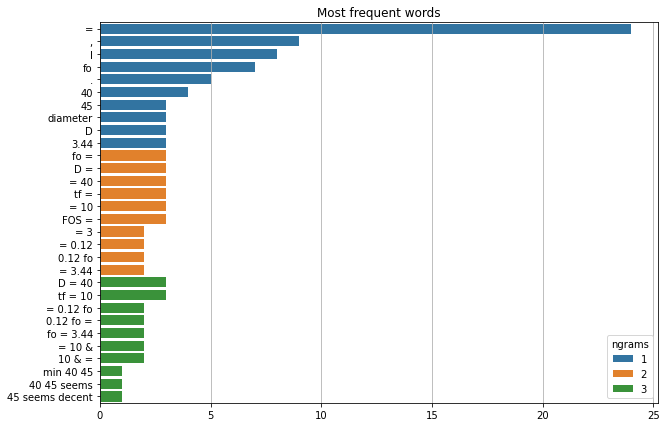

# Monitoring objective values:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


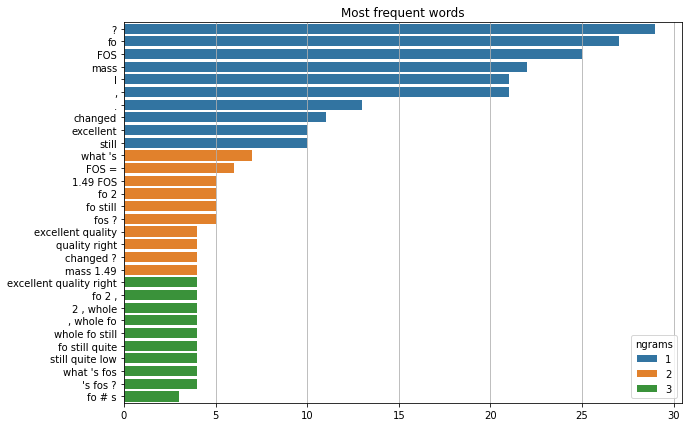

# Tradeoff between objectives:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


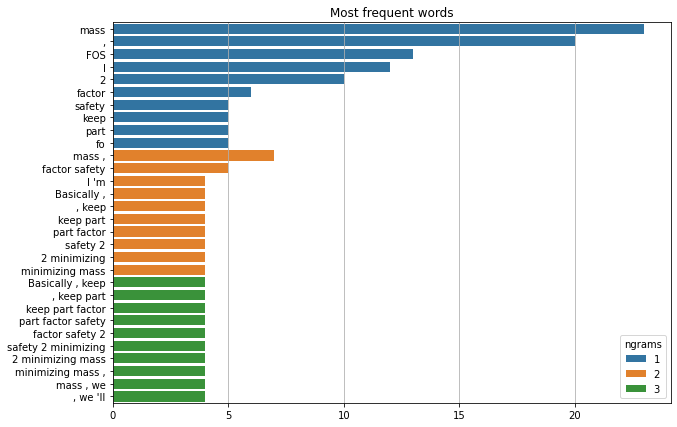

In [ ]:
dtf_freq = pd.DataFrame()
for y in dtf["y"].unique():
    print("# {}:".format(y))
    dtf_y = word_freq(corpus=dtf[dtf["y"]==y]["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))
    dtf_y["y"] = y
    dtf_freq = dtf_freq.append(dtf_y)

In [ ]:
# not necessary
dtf, dic_y_mapping = add_encode_variable(dtf, "y")

print(dic_y_mapping)
dtf[["y","y_id"]].sample(5)

{0: 'Dependencies between design parameters', 1: 'Effects of design parameters on objectives', 2: 'Exploration of design parameter values', 3: 'Monitoring objective values', 4: 'NAN', 5: 'Selected design parameter values for objective(s)', 6: 'Tradeoff between objectives'}


y  y_id
206  Effects of design parameters on objectives     1
83                                          NAN     4
379                 Monitoring objective values     3
303  Effects of design parameters on objectives     1
378                                         NAN     4

In [ ]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="y", test_size=0.3, shuffle=False)


X_train shape: (344, 19) | X_test shape: (148, 19)
y:
  NAN  -->  train: 0.35 | test: 0.33
  Monitoring objective values  -->  train: 0.22 | test: 0.19
  Effects of design parameters on objectives  -->  train: 0.16 | test: 0.16
  Exploration of design parameter values  -->  train: 0.14 | test: 0.1
  Dependencies between design parameters  -->  train: 0.06 | test: 0.05
  Selected design parameter values for objective(s)  -->  train: 0.05 | test: 0.05
  Tradeoff between objectives  -->  train: 0.02 | test: 0.12
20 features: ['text', 'text_tagged', 'tags', 'tags_DATE', 'tags_TIME', 'tags_ORG', 'tags_QUANTITY', 'tags_FAC', 'tags_PERSON', 'tags_CARDINAL', 'tags_LOC', 'text_clean', 'word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'sentiment', 'y_id']


In [ ]:
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

# BOW + ML

In [ ]:
# Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=100000, ngram_range=(1,6), lowercase=False)

--- creating sparse matrix ---
shape: (344, 3785)
--- creating vocabulary ---
3785 words
--- tokenization ---
344 texts


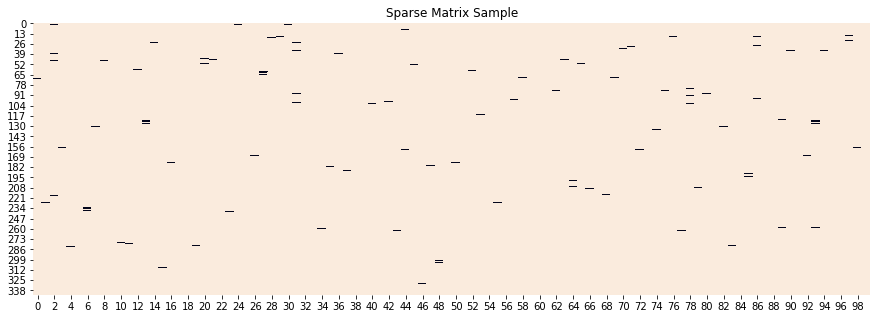

In [ ]:

dic_bow = fit_bow(corpus=dtf_train["text_clean"], vectorizer=vectorizer, vocabulary=None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [ ]:
# check some features
f_range = (500, 505)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'Let know adjust variable better': 500, 'Let know adjust variable better suite': 501, 'Lower': 502, 'Lower lower': 503, 'Lower lower mass': 504, 'Lower lower mass FOS': 505}

value of these features (in the sparse matrix) for the first text:
['Let know adjust variable better', 'Let know adjust variable better suite', 'Lower', 'Lower lower', 'Lower lower mass']
[[0. 0. 0. 0. 0.]]


In [ ]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["text_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  Hi piston! My crankshaft depends bore diameter. I yet know how, probably help know. | len: 14
to:  [357, 2705, 519, 1235, 1363, 996, 1448, 3771, 2142, 1982, 2807, 1959, 2142] | len: 13
check:  Hi  -- idx in vocabulary --> 357
!!! 1 words not in vocabulary: ['piston!', 'diameter.', 'I', 'how,', 'know.']


In [ ]:
X_names, dtf_selection = features_selection(X_train, dtf_train["y"], X_names, top=None, print_top=10)


features selection: from 3,785 to 404
 
# Dependencies between design parameters:
  . selected features: 81
  . top features: ds, shaft, shaft diameter, might, might piston, Does, Does flywheel, Does flywheel shaft, Does flywheel shaft diameter, Does flywheel shaft diameter ds
 
# Effects of design parameters on objectives:
  . selected features: 8
  . top features: increase mass, increase, max, effect, If, Increasing, 60, all
 
# Exploration of design parameter values:
  . selected features: 40
  . top features: trim, 40 work, try, adjust anything, need adjust, need adjust anything, work, work best, mm, 10
 
# Monitoring objective values:
  . selected features: 10
  . top features: fos, what, what fos, fo, right, FOS, excellent quality right, quality right, excellent quality, fo getting
 
# NAN:
  . selected features: 6
  . top features: broadcast, thank, sit, sit now, now, thank you
 
# Selected design parameter values for objective(s):
  . selected features: 94
  . top features: dia

In [ ]:
dtf_selection.sample(5)


feature  ...                                       y
3266          that pretty high mass  ...             Tradeoff between objectives
2095              inner piston bore  ...  Dependencies between design parameters
2180                      leave now  ...  Dependencies between design parameters
590   Ok want increase FOS decrease  ...             Tradeoff between objectives
787                          adjust  ...  Exploration of design parameter values

[5 rows x 3 columns]

--- creating sparse matrix ---
shape: (344, 404)
--- used vocabulary ---
404 words
--- tokenization ---
344 texts


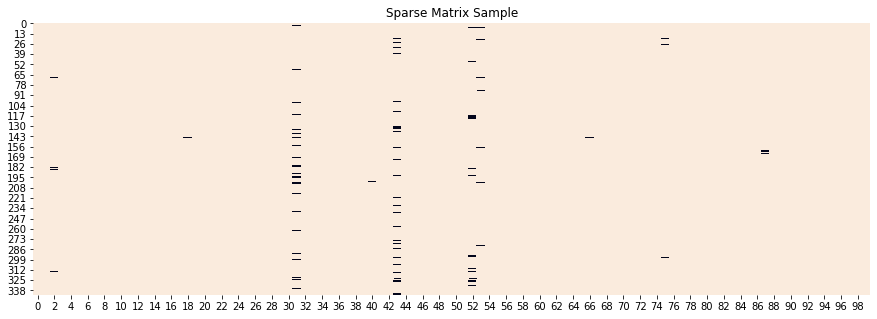

In [ ]:
# Recreate Vectorizer with the selected vocabulary
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vocabulary=X_names)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [ ]:
# Explore the sparse matrix as dtf
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, X_names, prefix="")

In [ ]:
dtf_X_train = pd.concat([dtf_train[["text","y"]], dtf_X_train.set_index(dtf_train.index)], axis=1)
dtf_X_train.head()

text  ... unless
0  Hi piston! My crankshaft depends on your bore ...  ...    0.0
1                                         thank you!  ...    0.0
2    How low can you go on the piston bore diameter?  ...    0.0
3  all my fos values are in the hundreds, i suspe...  ...    0.0
4  Hi flywheel! My crankshaft depends on your fly...  ...    0.0

[5 rows x 406 columns]

In [ ]:
#Model Design
classifier = naive_bayes.MultinomialNB()

In [ ]:
# Train/Test

# Take the raw text for X_test and will be transformed/predicted by the pipeline
X_test = dtf_test["text_clean"].values

In [ ]:
model, predicted_prob, predicted = fit_ml_classif(X_train, y_train, X_test, vectorizer, classifier)


Accuracy: 0.39
Auc: 0.57
Detail:
                                                   precision    recall  f1-score   support

           Dependencies between design parameters       0.00      0.00      0.00         7
       Effects of design parameters on objectives       0.20      0.04      0.07        23
           Exploration of design parameter values       0.33      0.07      0.11        15
                      Monitoring objective values       0.28      0.43      0.34        28
                                              NAN       0.44      0.88      0.59        49
Selected design parameter values for objective(s)       0.00      0.00      0.00         8
                      Tradeoff between objectives       0.00      0.00      0.00        18

                                         accuracy                           0.39       148
                                        macro avg       0.18      0.20      0.16       148
                                     weighted avg      

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


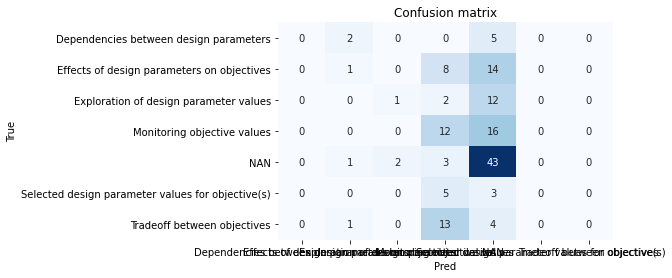

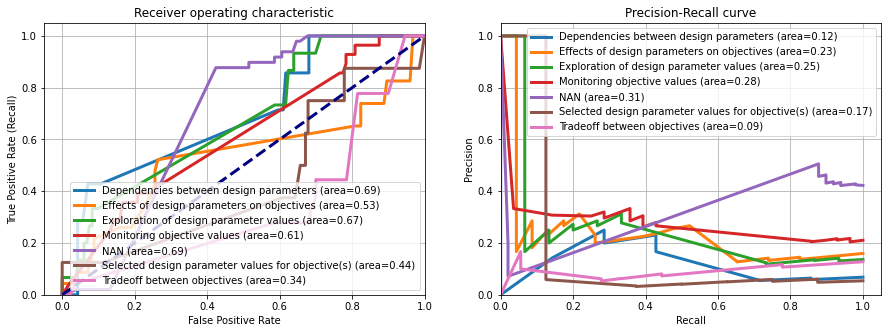

In [ ]:
#Evaluate
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))


In [ ]:
#Explain
i = 17
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),5))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["text"].iloc[i], top=10)
print(dtf_test["text"].iloc[i])

True: Selected design parameter values for objective(s) --> Pred: Monitoring objective values | Prob: 0.34982
 


for tf = 10 & ds = 15; m = 0.52 and FOS = 1215.12


##Model Desing & Testing (Embedding + Deep Learning)¶


In [ ]:
!gdown --id 1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4 --output nlp_util.py
from nlp_util import *

Downloading...
From: https://drive.google.com/uc?id=1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4
To: /content/nlp_util.py
100% 72.3k/72.3k [00:00<00:00, 5.05MB/s]


In [ ]:
# !pip install rouge
# !pip install transformers==3.0.0 
# !pip install sample_data
# !pip install lime

In [ ]:
#!pip install langdetect

     |████████████████████████████████| 983kB 29.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=a97cd3b0305f30b41be2ac3ed5592e4cbe77606949560fa268a8a788617003de
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
lst_common_terms = ["of","with","without","and","or","the","a"]
#dtf_train = dtf_train.explode('text_clean')
#dtf_train['text_clean'] = dtf_train['text_clean'].astype('category')
lst_ngrams_detectors, dtf_ngrams = create_ngrams_detectors(corpus=dtf_train["text_clean"],
                                                           lst_common_terms=lst_common_terms, 
                                                           min_count=5)

In [ ]:
dtf_ngrams.value_counts()

word           freq                    ngrams
look like      (6, 296.3333333333333)  2         1
bore diameter  (7, 69.72549019607843)  2         1
dtype: int64

In [ ]:
# fig, ax = plt.subplots()
# print("hehehehehe")
# sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,data=dtf_ngrams['ngrams'])
# ax.set(xlabel=None, ylabel=None, title="Most frequent words")
# ax.grid(axis="x")
# plt.show()

In [ ]:
    # fig, ax = plt.subplots(figsize=figsize)
    # #print("hehehehehe")
    # sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,data=dtf_ngrams.groupby('ngrams')["ngrams","freq","word"].head(top))
    # ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    # ax.grid(axis="x")
    # plt.show()

In [ ]:
# https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/natural_language_processing/example_text_classification.ipynb
#     https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
#         https://towardsdatascience.com/text-classification-with-no-model-training-935fe0e42180
#             https://event.asme.org/IDETC-CIE/Program/Student-Hackathon
#                 https://event.asme.org/Events/media/library/resources/idetc-cie/IDETC-2021-Student-Design-Essay-Competition.pdf
#                     https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28

In [ ]:
txt = "bore diameter is huge"
lst_ngrams_detectors[1][txt.split()]

['bore diameter', 'is', 'huge']

In [ ]:
dtf_ngrams.sample()


word                    freq  ngrams
1  look like  (6, 296.3333333333333)       2

--- tokenization ---
611 words
--- padding to sequence ---
344 sequences of length 15


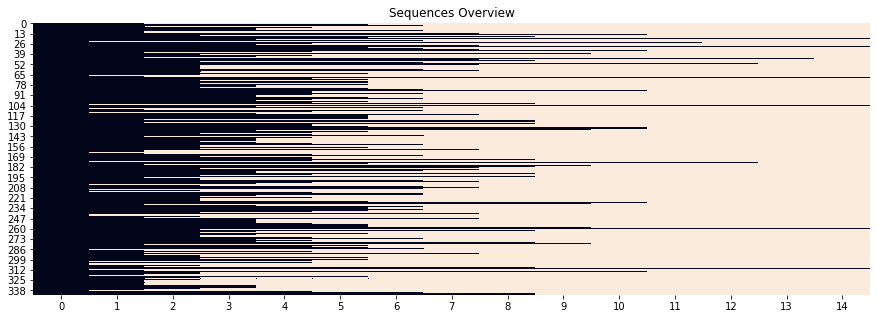

In [ ]:
# create input for lstm (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors, 
                   top=None, oov="NaN", maxlen=15)

X_train, tokenizer, dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [ ]:
# check text conversion
i = 1

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  thank you! | len: 2
to:  [51 80  0  0  0  0  0  0  0  0  0  0  0  0  0] | len: 15
check:  thank  -- idx in vocabulary --> 51
vocabulary:  {'NaN': 1, 'i': 2, 'mass': 3, 'fo': 4, 'fos': 5} ... (padding element, 0)


--- tokenization ---
--- padding to sequence ---
148 sequences of length 15


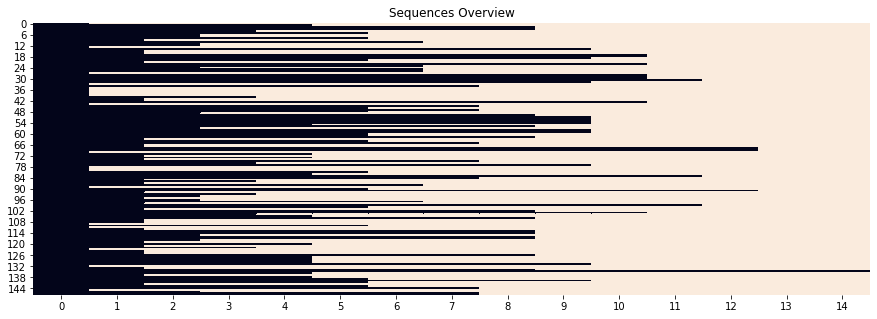

In [ ]:
# Preprocess Test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                  fitted_tokenizer=tokenizer, maxlen=X_train.shape[1])

In [ ]:
# Or train Word2Vec from scratch
avg_len = np.max([len(text.split()) for text in dtf_train["text_clean"]]) /2 

lst_corpus, nlp = fit_w2v(corpus=dtf_train["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                          min_count=1, size=300, window=avg_len, sg=0, epochs=30)

In [ ]:

# check nlp model
word = "bore"
nlp[word].shape

(300,)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


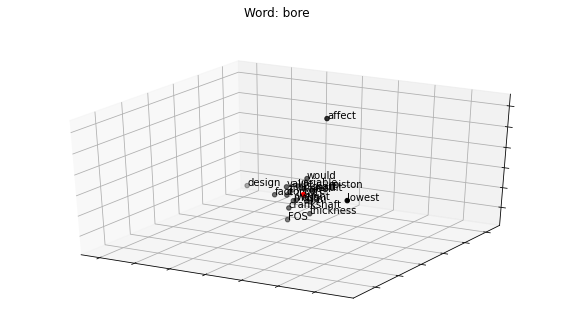

In [ ]:
plot_w2v(lst_words=[word], nlp=nlp, plot_type="3d", top=20, figsize=(10,5))

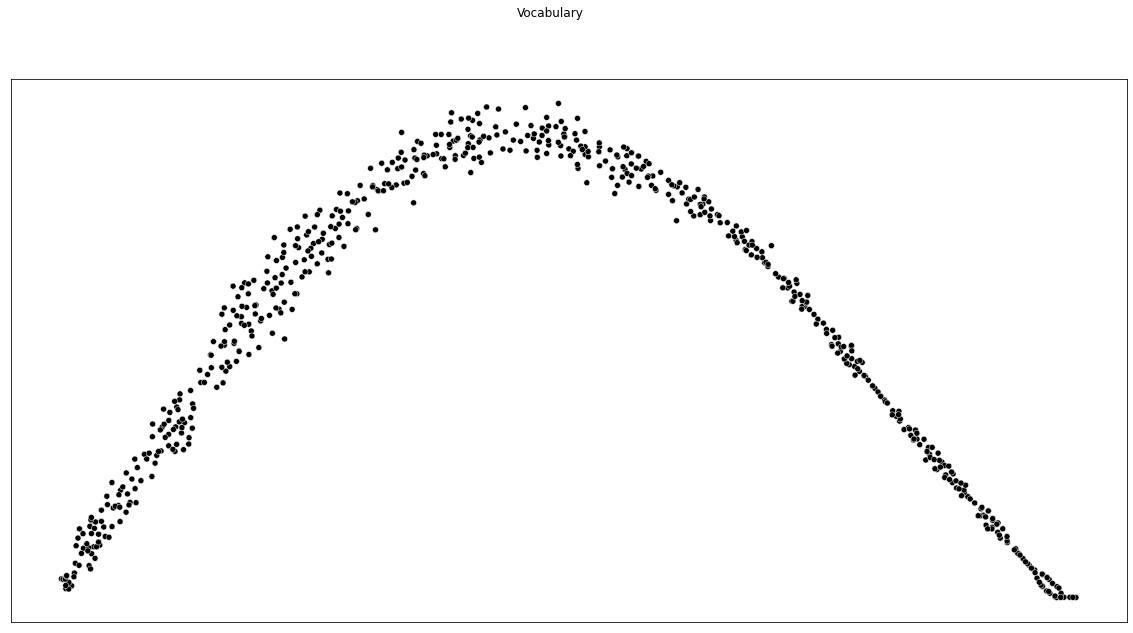

In [ ]:
plot_w2v(lst_words=None, nlp=nlp, plot_type="2d", annotate=False, figsize=(20,10))

### Create Weights

In [ ]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp)


vocabulary mapped to 612 vectors of size 300


In [ ]:
# check
word = dtf_train["text_clean"].iloc[1].split()[0]
print("word:", word)
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, "|vector")


word: thank
dic[word]: 51 |idx
embeddings[idx]: (300,) |vector


In [ ]:

# padding element
print("null vector:", 0)
embeddings[0]

null vector: 0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### model

In [ ]:

def attention_layer(x, neurons):
    Q, K, V = x, x, x
    K = layers.Permute((2,1))(K)
    QxK = layers.Dense(neurons, activation="softmax")(K)
    QxK = layers.Permute((2,1), name="attention")(QxK)
    x = layers.multiply([V, QxK])
    return x

In [ ]:
# Embedding network with Bi-LSTM and Attention layers (for attention explainer)

x_in = layers.Input(shape=(X_train.shape[1],))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1], weights=[embeddings],
                     input_length=X_train.shape[1], trainable=False)(x_in)
## attention
#x = attention_layer(x, neurons=X_train.shape[1])  #<-- tensorflow 1 (manual function)
x = layers.Attention()([x,x])                      #<-- tensorflow 2 (included in keras)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 300)      183600      input_1[0][0]                    
__________________________________________________________________________________________________
attention (Attention)           (None, 15, 300)      0           embedding[0][0]                  
                                                                 embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 15, 30)       37920       attention[0][0]              

{0: 'Dependencies between design parameters', 1: 'Effects of design parameters on objectives', 2: 'Exploration of design parameter values', 3: 'Monitoring objective values', 4: 'NAN', 5: 'Selected design parameter values for objective(s)', 6: 'Tradeoff between objectives'}


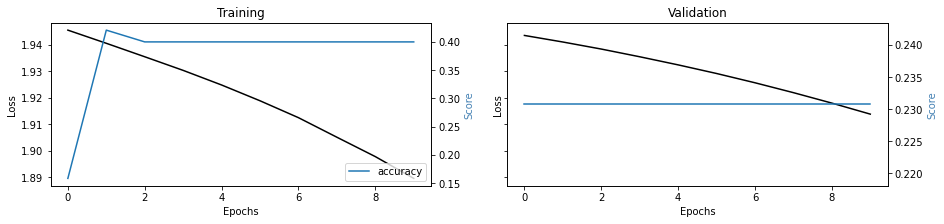

In [ ]:
# this takes a while
model, predicted_prob, predicted = fit_dl_classif(X_train, y_train, X_test, encode_y=True, 
                                                  model=model, epochs=10, batch_size=256)

Accuracy: 0.33
Auc: 0.43
Detail:
                                                   precision    recall  f1-score   support

           Dependencies between design parameters       0.00      0.00      0.00         7
       Effects of design parameters on objectives       0.00      0.00      0.00        23
           Exploration of design parameter values       0.00      0.00      0.00        15
                      Monitoring objective values       0.00      0.00      0.00        28
                                              NAN       0.33      1.00      0.50        49
Selected design parameter values for objective(s)       0.00      0.00      0.00         8
                      Tradeoff between objectives       0.00      0.00      0.00        18

                                         accuracy                           0.33       148
                                        macro avg       0.05      0.14      0.07       148
                                     weighted avg      

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


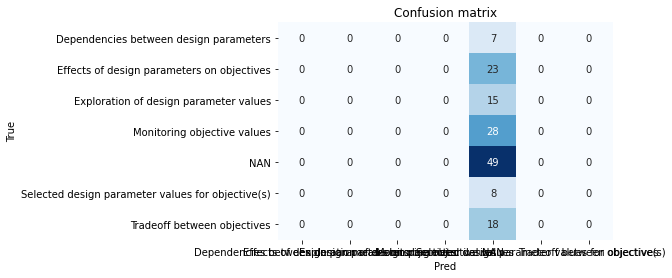

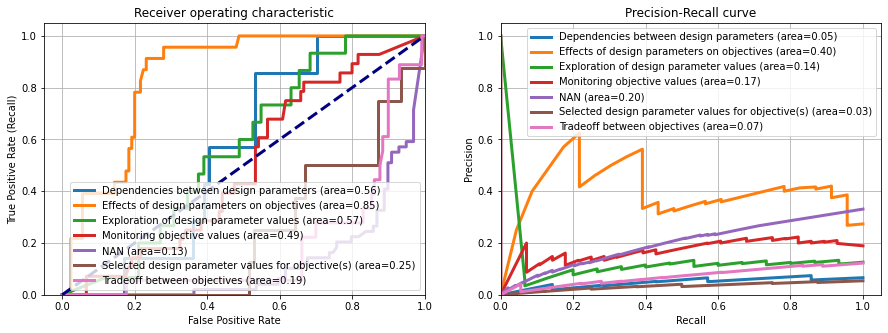

In [ ]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))


True: Tradeoff between objectives --> Pred: NAN | Prob: 0.17
 


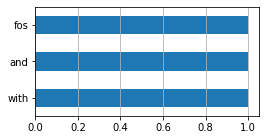

Text with highlighted words


In [ ]:
i = 2
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
text_exp = explainer_attention(model, tokenizer, dtf_test["text"].iloc[i], lst_ngrams_detectors, top=3, figsize=(4,2))

print("\033[1m"+"Text with highlighted words")
from IPython.core.display import display, HTML
display(HTML(text_exp))

## Model Desing & Testing (Language model + Transfer Learning)¶


In [ ]:
# Load pre-trained BERT tokenizer (use a lighter veriosn: distil-BERT)
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
lst_vocabulary = list(tokenizer.vocab.keys())

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# Load pre-trained BERT tokenizer
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
# lst_vocabulary = list(tokenizer.vocab.keys())

In [ ]:
# check nlp model
txt = "piston diameter"
X = embedding_bert(txt, tokenizer, nlp, log=True)
print("shape:", X.shape)
print("mean:", np.mean(X[1]))



tokens: ['[CLS]', 'piston', 'diameter', '[SEP]']
ids   : [101, 16733, 6705, 102]
shape: (2, 768)
mean: -0.009548542


In [ ]:
dtf_train['text'].isnull().values.any()

False

In [ ]:
#dtf_trains = dtf_train.dropna()
X_train = tokenize_bert(corpus=dtf_train["text"], tokenizer=tokenizer, maxlen=50)


maxlen: 50
created tensor idx-masks-segments: 3x (344, 52)


In [ ]:
# check feature creation
i = 0

print("txt: ", dtf_train["text"].iloc[0])
print("tokenized:", [tokenizer.convert_ids_to_tokens(idx) for idx in X_train[0][i].tolist()])
print("idx: ", X_train[0][i])
print("mask: ", X_train[1][i])
print("segment: ", X_train[2][i])

txt:  Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.
tokenized: ['[CLS]', '[CLS]', 'hi', 'piston', 'my', 'crank', '##shaft', 'depends', 'on', 'your', 'bore', 'diameter', 'i', 'don', '##t', 'yet', 'know', '[SEP]', '[UNK]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[SEP]']
idx:  [  101   101  7632 16733  2026 27987 25679  9041  2006  2115  8501  6705
  1045  2123  2102  2664  2113   102   100     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   102]
mask:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [ ]:
X_test = tokenize_bert(corpus=dtf_test["text"], tokenizer=tokenizer, maxlen=50)

maxlen: 50
created tensor idx-masks-segments: 3x (148, 52)


In [ ]:
#!pip install transformers==3.0.0

In [ ]:

# # inputs
# idx = layers.Input((52), dtype="int32", name="input_idx")
# masks = layers.Input((52), dtype="int32", name="input_masks")
# segments = layers.Input((52), dtype="int32", name="input_segments")
# # pre-trained bert
# bert = transformers.TFBertModel.from_pretrained("bert-base-uncased")
# bert_out, _ = bert([idx, masks, segments])
# # fine-tuning
# x = layers.GlobalAveragePooling1D()(bert_out)
# x = layers.Dense(64, activation="relu")(x)
# y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
# # compile
# model = models.Model([idx, masks, segments], y_out)
# for layer in model.layers[:7]:
#    layer.trainable = False
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

## inputs
idx = layers.Input((X_train[0].shape[1]-2), dtype="int32", name="input_idx")
masks = layers.Input((X_train[1].shape[1]), dtype="int32", name="input_masks")
## pre-trained bert with config
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
bert_out = nlp(idx, attention_mask=masks)[0]
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out)
x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
model = models.Model(inputs=[idx, masks], outputs=y_out)
for layer in model.layers[:4]:
    layer.trainable = False
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_13 (TFDist ((None, 50, 768),)   66362880    input_idx[0][0]                  
                                                                 input_masks[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_12 (Gl (None, 768)          0           tf_distil_bert_model_13[0]

In [ ]:
X_train[0].shape

(344, 52)

In [ ]:
dic_y_mapping = {n:label for n,label in enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array( [inverse_dic[y] for y in y_train] )

In [ ]:
inp = X_train[0][:,:-2]

In [ ]:
#!gdown --id 1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4 --output nlp_utilm.py
#from nlp_utilm import *
training = model.fit(x=(inp,X_train[1]), 
                     y=y_train, batch_size=64, epochs=1, shuffle=True, verbose=0, validation_split=0.3)
# model, predicted_prob, predicted = fit_bert_classif((X_train[0],X_train[1]), 
#                                                     y_train, 
#                                                     X_test, 
#                                                     encode_y=True, 
#                                                     model=model, 
#                                                     epochs=1, 
#                                                     batch_size=64)

In [ ]:
ins = (X_test[0][:,:-2],X_test[1])

In [ ]:
predicted_prob = model.predict(ins)

In [ ]:
predicted_prob

array([[0.0793406 , 0.1521812 , 0.12731601, ..., 0.34618986, 0.05736354,
        0.09649374],
       [0.06878783, 0.1804382 , 0.15516414, ..., 0.24820893, 0.06609554,
        0.09176525],
       [0.08577584, 0.16291958, 0.15956235, ..., 0.21055447, 0.09005082,
        0.11699963],
       ...,
       [0.07222855, 0.09165333, 0.16977142, ..., 0.37228206, 0.04257665,
        0.09616578],
       [0.07251874, 0.1395613 , 0.14445457, ..., 0.345988  , 0.05901128,
        0.08673854],
       [0.08280996, 0.151227  , 0.14946811, ..., 0.30767533, 0.07157796,
        0.09717488]], dtype=float32)

In [ ]:
predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

In [ ]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print(metrics.classification_report(y_test.astype(str), np.array(predicted).astype(str)))

Accuracy: 0.0
Auc: 0.68
                                                   precision    recall  f1-score   support

                                                1       0.00      0.00      0.00       0.0
                                                2       0.00      0.00      0.00       0.0
                                                3       0.00      0.00      0.00       0.0
                                                4       0.00      0.00      0.00       0.0
           Dependencies between design parameters       0.00      0.00      0.00       7.0
       Effects of design parameters on objectives       0.00      0.00      0.00      23.0
           Exploration of design parameter values       0.00      0.00      0.00      15.0
                      Monitoring objective values       0.00      0.00      0.00      28.0
                                              NAN       0.00      0.00      0.00      49.0
Selected design parameter values for objective(s)       0.00     

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


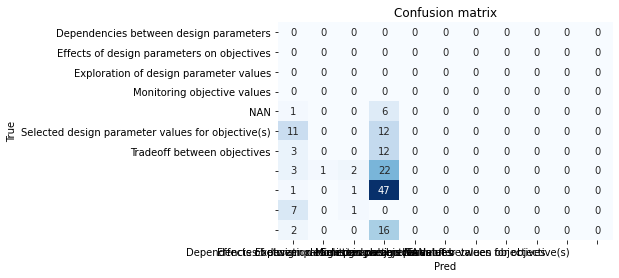

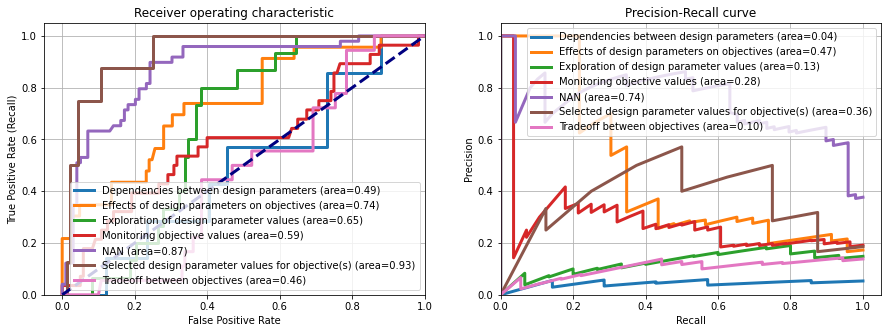

In [ ]:
import numpy as np
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
cm = metrics.confusion_matrix(y_test.astype(str), np.array(predicted).astype(str))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
    ## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

#### Model Desing & Testing (Clustering by Similarity)


In [ ]:
# Load pre-trained W2V
nlp = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
dtf_selection.sample(3)

feature     score                            y
1679  factor safety weight  0.987320  Tradeoff between objectives
830            aim smaller  0.998143  Tradeoff between objectives
1213     conserve mass FOS  0.995632  Tradeoff between objectives

In [ ]:
dic_clusters = {}
#print(np.unique(y_train))
for y in np.unique(dtf_train["y"]):
  dic_clusters[y] = [word for word in dtf_selection[dtf_selection["y"]==y]["feature"].tolist() if nlp.vocab.get(word)]
#print(dic_clusters)

for k,v in dic_clusters.items():
  print(k, ": ", v[0:5], "...", len(v))

Dependencies between design parameters :  ['ds', 'shaft', 'might', 'control', 'flywheel'] ... 13
Effects of design parameters on objectives :  ['increase', 'max', 'effect', '60', 'all'] ... 5
Exploration of design parameter values :  ['trim', 'try', 'work', 'mm', '10'] ... 7
Monitoring objective values :  ['fos', 'what', 'fo', 'right'] ... 4
NAN :  ['broadcast', 'thank', 'sit', 'now'] ... 4
Selected design parameter values for objective(s) :  ['section', 'min', 'least', 'leaving', 'oops'] ... 20
Tradeoff between objectives :  ['fully', 'aim', 'cut', 'bring', 'high'] ... 10


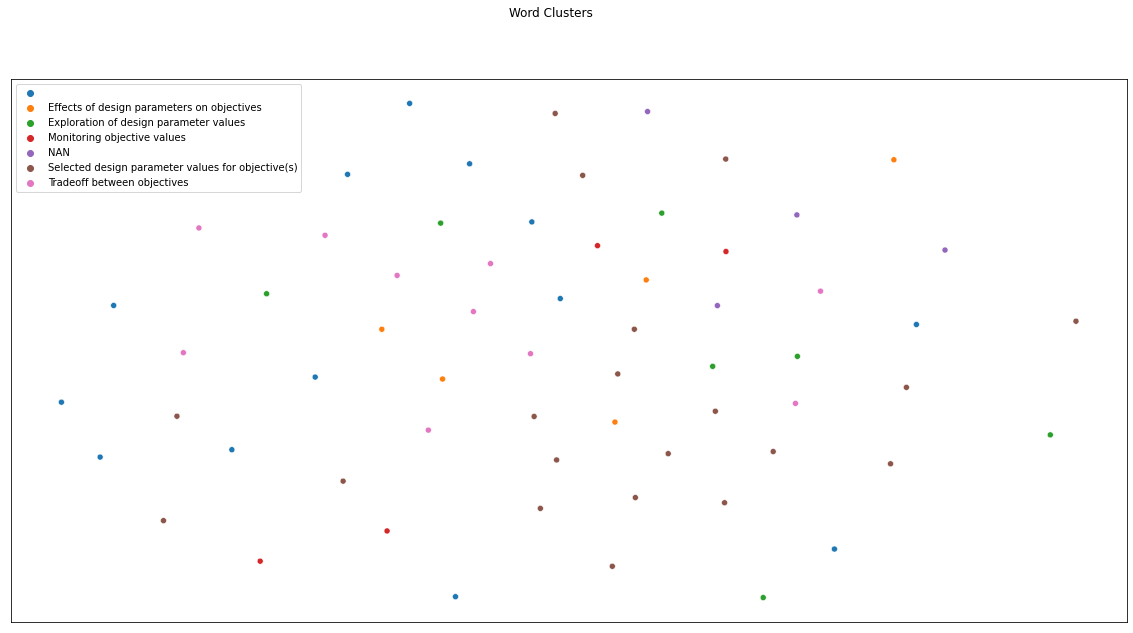

In [ ]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="2d", annotate=False, figsize=(20,10))


# NAN:
--- training ---


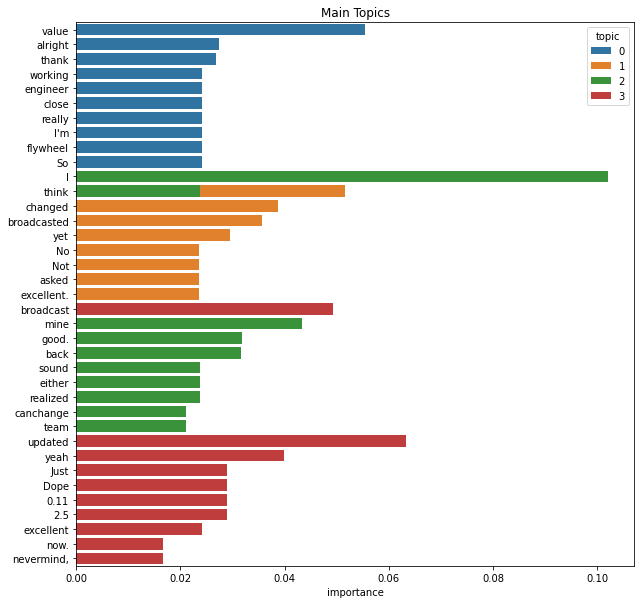

 
# Exploration of design parameter values:
--- training ---


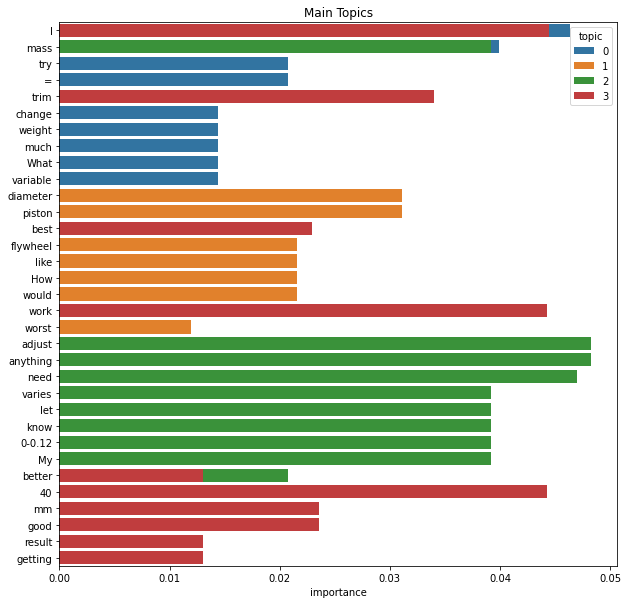

 
# Effects of design parameters on objectives:
--- training ---


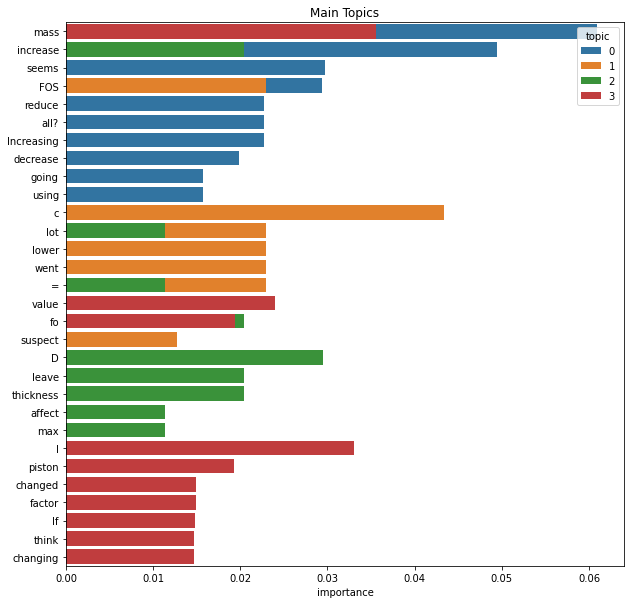

 
# Dependencies between design parameters:
--- training ---


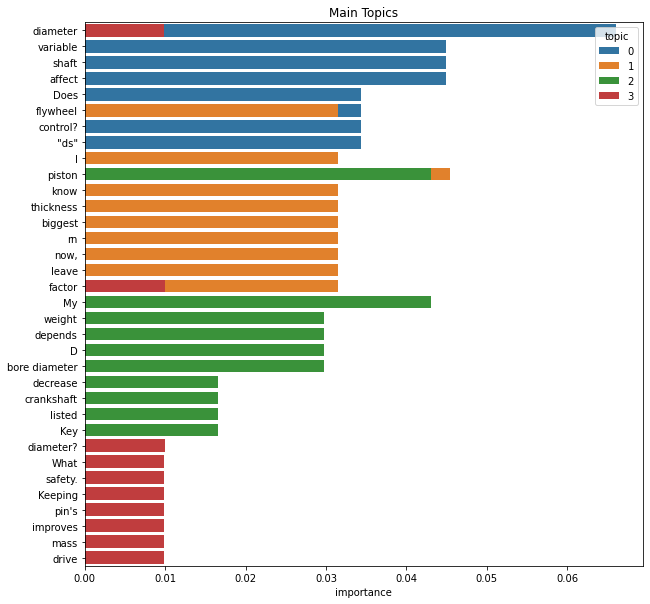

 
# Selected design parameter values for objective(s):
--- training ---


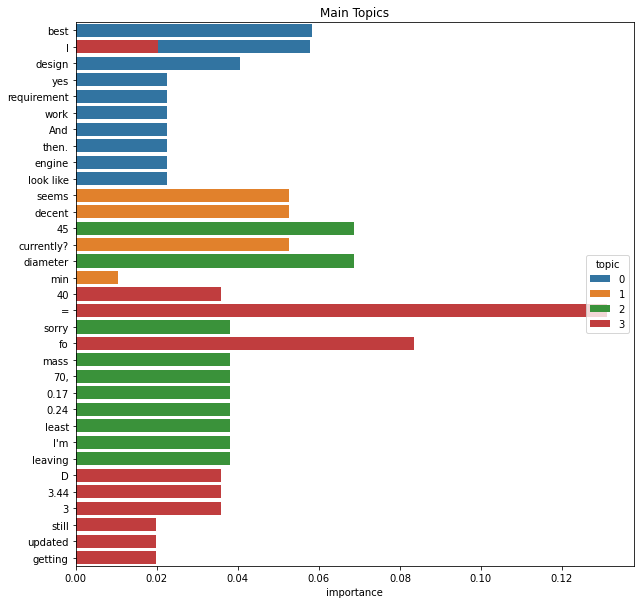

 
# Monitoring objective values:
--- training ---


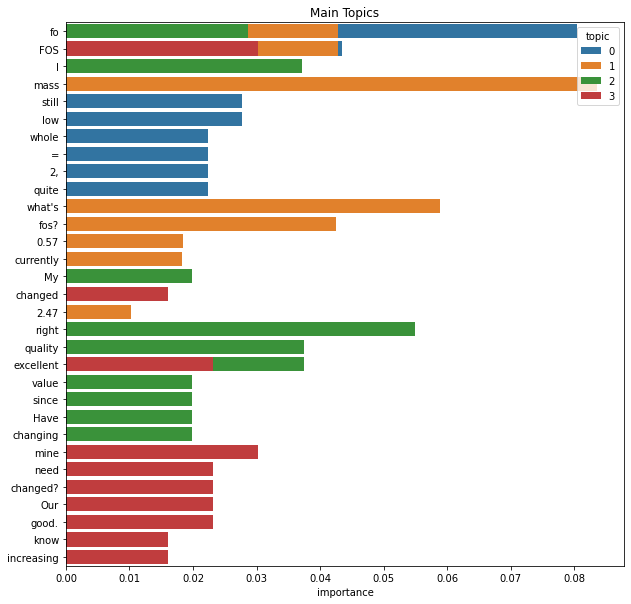

 
# Tradeoff between objectives:
--- training ---


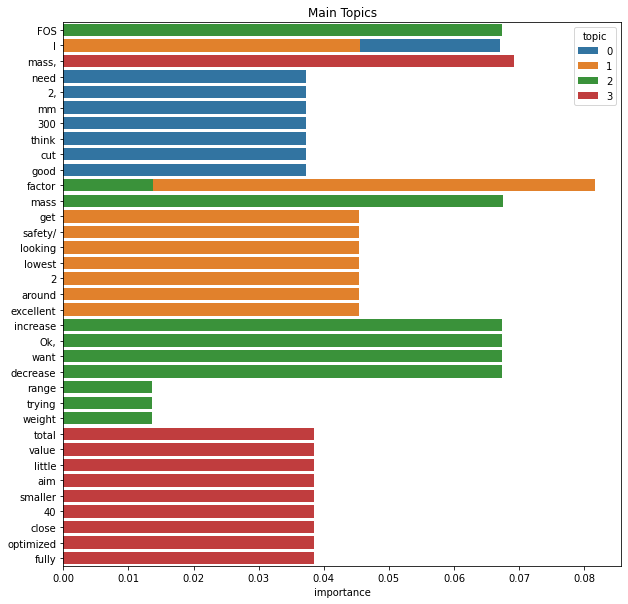

In [ ]:
# Strategy 2) LDA for topic modeling
dtf_topics = pd.DataFrame()
for y in dtf_train["y"].unique():
    print("# {}:".format(y))
    lda, dtf_y = fit_lda(corpus=dtf_train[dtf_train["y"]==y]["text_clean"], n_topics=4, 
                         lst_ngrams_detectors=lst_ngrams_detectors, figsize=(10,10))
    dtf_y["y"] = y
    dtf_topics = dtf_topics.append(dtf_y)
    print(" ")

In [ ]:
dtf_topics.sample(5)


topic   id  ...    weight                                                  y
9       0   28  ...  0.014375             Exploration of design parameter values
28      2   53  ...  0.038120  Selected design parameter values for objective(s)
13      1    5  ...  0.045403                        Tradeoff between objectives
38      3   49  ...  0.038494                        Tradeoff between objectives
8       0  235  ...  0.024233                                                NAN

[5 rows x 5 columns]

In [ ]:
dic_clusters = {y:dtf_topics[dtf_topics["y"]==y]["word"].values.tolist() for y in dtf_topics["y"].unique()}

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

NAN :  ['value', 'alright', 'thank', 'working', 'engineer'] ... 40
Exploration of design parameter values :  ['I', 'mass', 'try', '=', 'trim'] ... 40
Effects of design parameters on objectives :  ['mass', 'increase', 'seems', 'FOS', 'reduce'] ... 40
Dependencies between design parameters :  ['diameter', 'variable', 'shaft', 'affect', 'Does'] ... 40
Selected design parameter values for objective(s) :  ['best', 'I', 'design', 'yes', 'requirement'] ... 40
Monitoring objective values :  ['fo', 'FOS', 'I', 'mass', 'still'] ... 40
Tradeoff between objectives :  ['FOS', 'I', 'mass,', 'need', '2,'] ... 40


In [ ]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="3d", annotate=True, figsize=(20,10))


--- got error ---
"word 'I'm' not in vocabulary"
maybe you are looking for ... 
[]


<Figure size 1440x720 with 0 Axes>

In [ ]:
nlp.most_similar(["shaft"], topn=3)


[('shafts', 0.7714196443557739),
 ('propeller', 0.5496650338172913),
 ('vertical', 0.5034777522087097)]

In [ ]:
dic_clusters = {}
dic_clusters["NAN"] = get_similar_words(['value', 'alright', 'thank', 'working', 'engineer'], top=25, nlp=nlp)
dic_clusters["Exploration of design parameter values"] = get_similar_words(['check', 'mass', 'try', 'value', 'trim'], top=40, nlp=nlp)
dic_clusters["Effects of design parameters on objectives"] = get_similar_words(['mass', 'increase', 'seems', 'safety', 'reduce'], top=40, nlp=nlp)
dic_clusters["Dependencies between design parameters"] = get_similar_words(['diameter', 'variable', 'shaft', 'affect', 'does'], top=40, nlp=nlp)
dic_clusters["Selected design parameter values for objective(s)"] = get_similar_words(['best', 'final', 'design', 'yes', 'requirement'], top=40, nlp=nlp)
dic_clusters["Monitoring objective values"] = get_similar_words(['monitor', 'factor', 'evaluate', 'mass', 'still'], top=40, nlp=nlp)
dic_clusters["Tradeoff between objectives"] = get_similar_words(['factor', 'settle', 'mass', 'need', 'adjust'], top=40, nlp=nlp)

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

NAN :  ['really', 'engineer', 'worked', 'you', 'value'] ... 30
Exploration of design parameter values :  ['to', 'if', 'could', 'keep', 'you'] ... 45
Effects of design parameters on objectives :  ['because', 'if', 'increase', 'could', 'fact'] ... 45
Dependencies between design parameters :  ['affects', 'either', 'shaft', 'if', 'because'] ... 45
Selected design parameter values for objective(s) :  ['.', 'required', 'final', 'if', 'because'] ... 45
Monitoring objective values :  ['because', 'if', 'could', 'ability', 'fact'] ... 45
Tradeoff between objectives :  ['means', 'allow', 'to', 'if', 'because'] ... 45


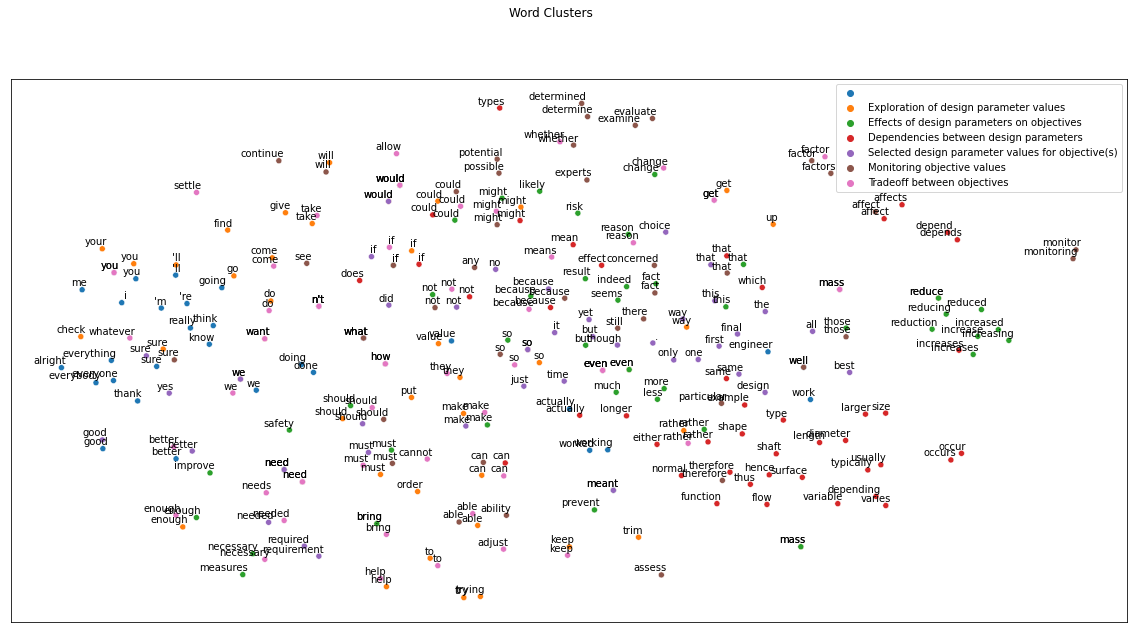

In [ ]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="2d", annotate=True, figsize=(20,10))


In [ ]:
### Feature Engineering


# Load pre-trained BERT tokenizer (use a lighter veriosn: distil-BERT)
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
lst_vocabulary = list(tokenizer.vocab.keys())


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:

# Create X (Unsupervised, so no need to use dtf_train)
X_test = embedding_bert(dtf_test["text_clean"], tokenizer, nlp)
X_test.shape

(148, 768)

In [ ]:
dic_y = {k:embedding_bert(v, tokenizer, nlp).mean(0) for k,v in dic_clusters.items()}
dic_y['Dependencies between design parameters'].shape

(768,)

In [ ]:
predicted_prob, predicted = predict_similarity_classif(X_test, dic_y)


Accuracy: 0.26
Auc: 0.54
Detail:
                                                   precision    recall  f1-score   support

           Dependencies between design parameters       0.11      0.57      0.19         7
       Effects of design parameters on objectives       0.16      0.13      0.14        23
           Exploration of design parameter values       0.17      0.40      0.24        15
                      Monitoring objective values       0.00      0.00      0.00        28
                                              NAN       0.64      0.51      0.57        49
Selected design parameter values for objective(s)       0.07      0.12      0.09         8
                      Tradeoff between objectives       0.00      0.00      0.00        18

                                         accuracy                           0.26       148
                                        macro avg       0.16      0.25      0.17       148
                                     weighted avg      

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


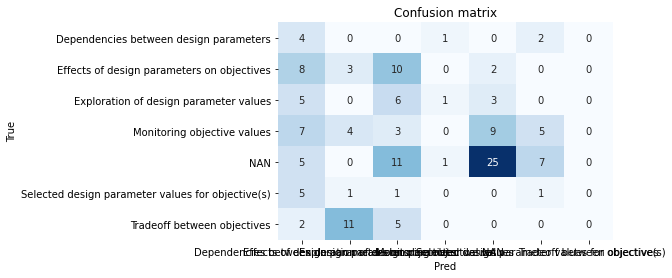

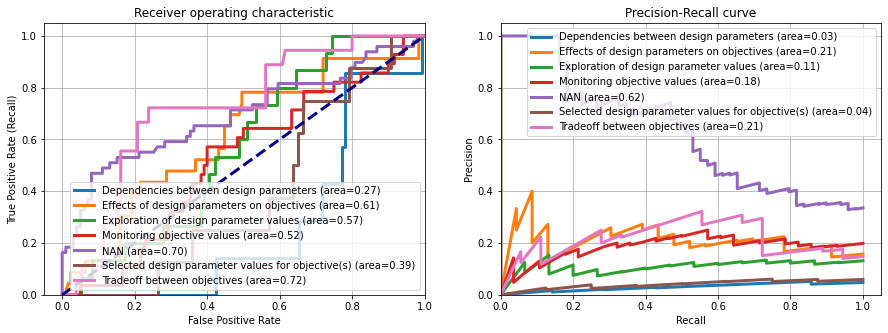

In [ ]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

True: Selected design parameter values for objective(s) --> Pred: Selected design parameter values for objective(s) | Similarity: 0.15
 
I think I optimized mine well mass 0.10 fo 2.77


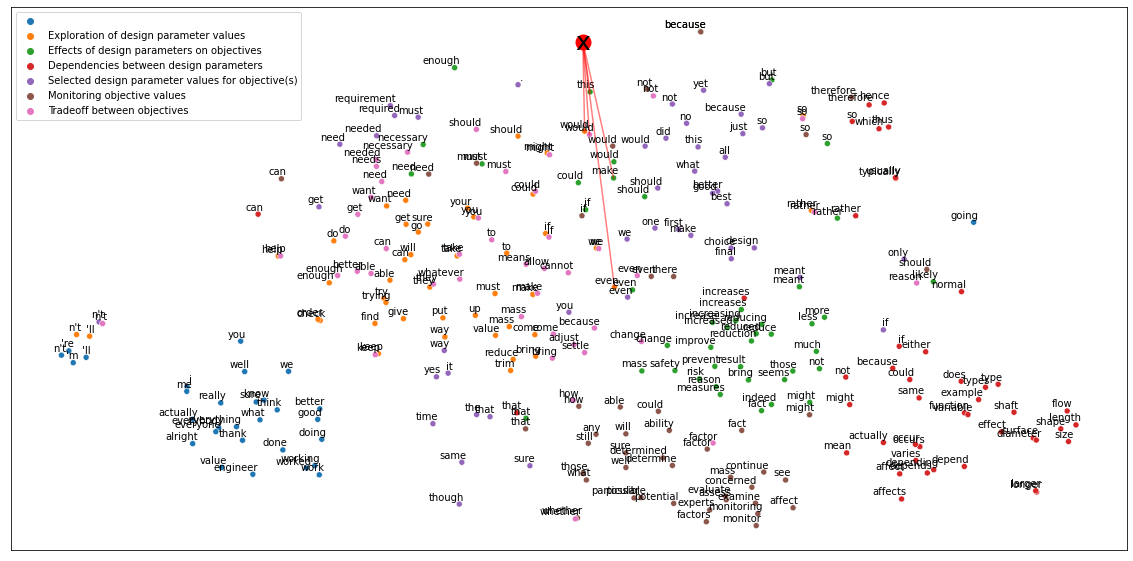

In [ ]:
i = 19
print("True:", y_test[i], "--> Pred:", predicted[i], "| Similarity:", round(np.max(predicted_prob[i]),2))
print(" ")
print(dtf_test["text_clean"].iloc[i])
explainer_similarity_classif(tokenizer, nlp, dic_clusters, dtf_test["text_clean"].iloc[i], 
                             token_level=False, top=5, figsize=(20,10))

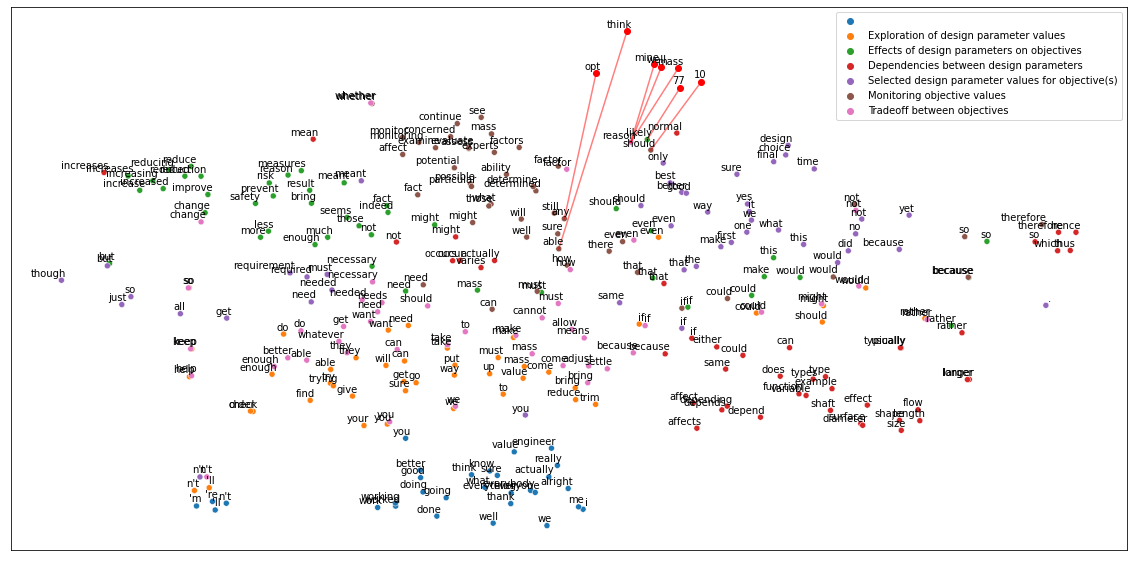

In [ ]:

explainer_similarity_classif(tokenizer, nlp, dic_clusters, dtf_test["text_clean"].iloc[i], 
                             token_level=True, top=1, figsize=(20,10))